Illustrating Prices in different provinces in Spain through Idealista API

In [2]:
# Import required libraries
import pandas as pd
from plotnine import *

#import csv file
df = pd.read_csv('~/Desktop/DS105L/Project/rental-output.csv')
print(df)


       price propertyType operation   size  rooms  bathrooms    province   
0     1200.0         flat      rent  130.0      3          2   Barcelona  \
1     1390.0         flat      rent   90.0      2          2   Barcelona   
2     3000.0       chalet      rent  323.0      4          4   Barcelona   
3     4200.0       chalet      rent  507.0      5          5   Barcelona   
4     9000.0       chalet      rent  957.0      5          6   Barcelona   
...      ...          ...       ...    ...    ...        ...         ...   
4516   750.0         flat      rent   65.0      1          1  Las Palmas   
4517   850.0         flat      rent   65.0      3          1  Las Palmas   
4518  1400.0         flat      rent  130.0      3          2  Las Palmas   
4519   650.0    penthouse      rent   30.0      0          1  Las Palmas   
4520  1300.0         flat      rent  115.0      3          2  Las Palmas   

                    municipality           district country  distance   
0          Cer

In [3]:
# Count the values in the 'province' column
counts = df['province'].value_counts()

In [4]:
print(counts)

province
Barcelona          500
Madrid             500
València           500
Sevilla            500
Málaga             500
Granada            500
Balears (Illes)    476
Vizcaya            399
Zaragoza           381
Las Palmas         265
Name: count, dtype: int64


In [5]:
# Group the rows by city and calculate the mean price
summary_price = df.groupby('province')['priceByArea'].median().reset_index()


In [6]:
print(summary_price)

          province  priceByArea
0  Balears (Illes)         16.5
1        Barcelona         20.0
2          Granada          9.0
3       Las Palmas         12.0
4           Madrid         18.0
5           Málaga         13.0
6          Sevilla         11.0
7         València         12.0
8          Vizcaya         13.0
9         Zaragoza          9.0


In [7]:
print(type(summary_price))

<class 'pandas.core.frame.DataFrame'>


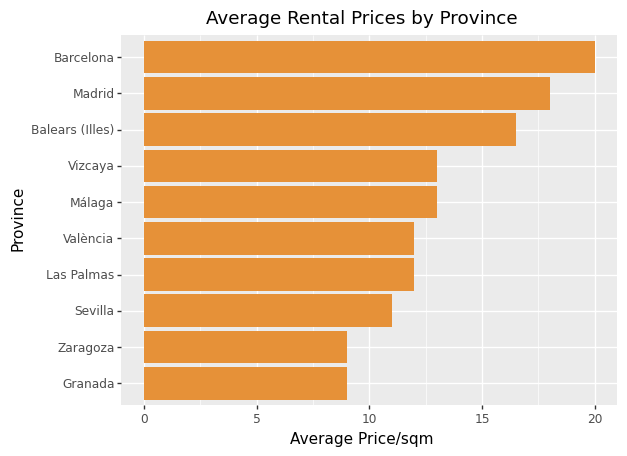

<ggplot: (8775008090365)>

In [8]:
# create a bar chart
ggplot(summary_price, aes(x='reorder(province, priceByArea)', y='priceByArea')) + \
    geom_bar(stat='identity', fill='#E69138', position='dodge') + \
    labs(title='Rental Prices by Province', x='Province', y='Median Price/sqm') + \
    coord_flip()